C:\Users\jeepr\AppData\Local\Temp/ipykernel_32984/3281426652.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbe_tight_data['X'] = pbe_tight_data['File'].map(file_to_x)
C:\Users\jeepr\AppData\Local\Temp/ipykernel_32984/3281426652.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hse_tight_data['X'] = hse_tight_data['File'].map(file_to_x)


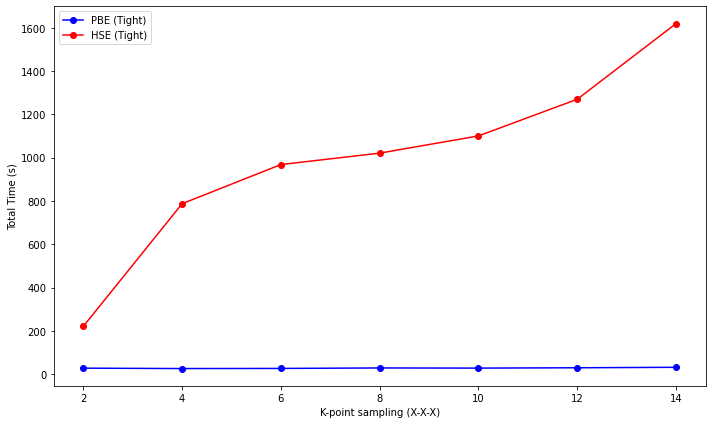

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('extracted_data.csv')

# Filter data for Tight settings
pbe_tight_data = data[(data['PBE/HSE'] == 'PBE') & (data['Category'] == 'Tight')]
hse_tight_data = data[(data['PBE/HSE'] == 'HSE') & (data['Category'] == 'Tight')]

# Map the 'File' names to their corresponding x-axis values
file_to_x = {
    'aims02.out': 2,
    'aims04.out': 4,
    'aims06.out': 6,
    'aims08.out': 8,
    'aims10.out': 10,
    'aims12.out': 12,
    'aims14.out': 14
}

# Apply the mapping to get the x-axis values for both datasets
pbe_tight_data['X'] = pbe_tight_data['File'].map(file_to_x)
hse_tight_data['X'] = hse_tight_data['File'].map(file_to_x)

# Plotting
plt.figure(figsize=(10, 6))

# Plot for PBE (Tight)
plt.plot(pbe_tight_data['X'], pbe_tight_data['Total Time'], 'o-', label='PBE (Tight)', color='b')

# Plot for HSE (Tight)
plt.plot(hse_tight_data['X'], hse_tight_data['Total Time'], 'o-', label='HSE (Tight)', color='r')

# Labels and Title
plt.xlabel('K-point sampling (X-X-X)')
plt.ylabel('Total Time (s)')
plt.xticks(ticks=[2, 4, 6, 8, 10, 12, 14], labels=[2, 4, 6, 8, 10, 12, 14])  # X-ticks

plt.legend()

# Save the plot as a PNG file with the title as the filename
plt.tight_layout()
plt.savefig(f'{title}.png', dpi=300)

# Display the plot
plt.show()


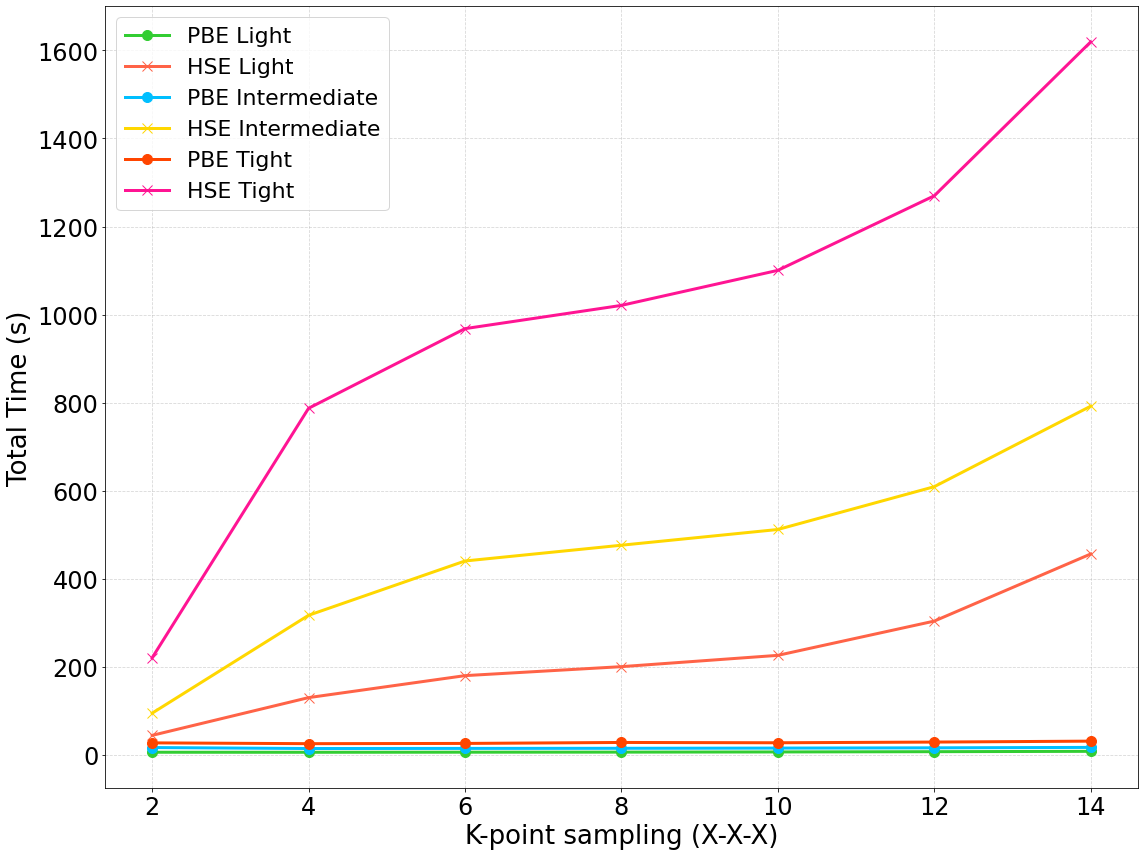

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('extracted_data.csv')

# Filter for each combination
categories = ['Light', 'Intermediate', 'Tight']

# Map file names to corresponding K-point values
file_to_x = {
    'aims02.out': 2,
    'aims04.out': 4,
    'aims06.out': 6,
    'aims08.out': 8,
    'aims10.out': 10,
    'aims12.out': 12,
    'aims14.out': 14
}

# Add X column
data['X'] = data['File'].map(file_to_x)

# Set colors (bright, easily distinguishable colors)
colors = {
    'Light': ('#FF6347', '#32CD32'),         # bright red (HSE), bright green (PBE)
    'Intermediate': ('#FFD700', '#00BFFF'),  # bright yellow (HSE), bright sky blue (PBE)
    'Tight': ('#FF1493', '#FF4500')           # deep pink (HSE), orange red (PBE)
}

# Start plotting
plt.figure(figsize=(16, 12))

for category in categories:
    # Select data
    pbe_data = data[(data['PBE/HSE'] == 'PBE') & (data['Category'] == category)]
    hse_data = data[(data['PBE/HSE'] == 'HSE') & (data['Category'] == category)]

    # Plot
    plt.plot(pbe_data['X'], pbe_data['Total Time'], 'o-', label=f'PBE {category}', color=colors[category][1], 
             linewidth=3, markersize=10)
    plt.plot(hse_data['X'], hse_data['Total Time'], 'x-', label=f'HSE {category}', color=colors[category][0], 
             linewidth=3, markersize=10)

# Labels (no title)
plt.xlabel('K-point sampling (X-X-X)', fontsize=26)
plt.ylabel('Total Time (s)', fontsize=26)

# Set x-ticks
plt.xticks(ticks=[2, 4, 6, 8, 10, 12, 14], fontsize=24)
plt.yticks(fontsize=24)

# Grid, Legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=22, loc='upper left', frameon=True)

# Save
filename = 'Total Time vs K-point sampling (X-X-X) for PBE and HSE.png'
plt.tight_layout()
plt.savefig(filename, dpi=300)

# Show
plt.show()